In [50]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint
from sklearn.ensemble import IsolationForest, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
# Carregando o Dataset
url = 'https://raw.githubusercontent.com/klaytoncastro/idp-storytelling/master/airquality/airquality.csv'
df = pd.read_csv(url, delimiter = ';', decimal = ',')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [52]:
# Verificando a estrutura de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [53]:
# Convertendo as colunas Date e Time para DateTime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')

# Removendo as colunas originais Date e Time
df.drop(columns=['Date', 'Time'], inplace=True)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9357 non-null   float64       
 1   PT08.S1(CO)    9357 non-null   int64         
 2   NMHC(GT)       9357 non-null   int64         
 3   C6H6(GT)       9357 non-null   float64       
 4   PT08.S2(NMHC)  9357 non-null   int64         
 5   NOx(GT)        9357 non-null   int64         
 6   PT08.S3(NOx)   9357 non-null   int64         
 7   NO2(GT)        9357 non-null   int64         
 8   PT08.S4(NO2)   9357 non-null   int64         
 9   PT08.S5(O3)    9357 non-null   int64         
 10  T              9357 non-null   float64       
 11  RH             9357 non-null   float64       
 12  AH             9357 non-null   float64       
 13  DateTime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(8)
memory usage: 1023.5 KB


In [20]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00


In [22]:
# Calculando as correlações entre as variáveis ​​preditoras e a variável alvo
correlations = df.corr()['CO(GT)'].sort_values(ascending=False)
print(correlations)

CO(GT)           1.000000
NO2(GT)          0.671127
NOx(GT)          0.526451
DateTime         0.136673
NMHC(GT)         0.128351
PT08.S5(O3)      0.080310
PT08.S1(CO)      0.041411
PT08.S2(NMHC)    0.029926
C6H6(GT)        -0.031378
AH              -0.045892
RH              -0.048227
T               -0.068939
PT08.S4(NO2)    -0.073724
PT08.S3(NOx)    -0.089981
Name: CO(GT), dtype: float64


In [23]:
# Verificando a distribuição dos dados
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,2004-09-21 16:00:00
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,2004-03-10 18:00:00
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,2004-06-16 05:00:00
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,2004-09-21 16:00:00
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,2004-12-28 03:00:00
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005-04-04 14:00:00
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN


In [24]:
# Identificamos um padrão estranho, onde -200 aparece como valor mínimo para cada uma das variáveis.
# Por isso, vamos contar valores -200 em cada coluna e avaliar se isso é frequente ou eventual.
print("Contagem de valores -200 em cada coluna:")
for column in df.columns:
    count_negative_200 = (df[column] == -200).sum()
    print(f"{column}: {count_negative_200}")

Contagem de valores -200 em cada coluna:
CO(GT): 1683
PT08.S1(CO): 366
NMHC(GT): 8443
C6H6(GT): 366
PT08.S2(NMHC): 366
NOx(GT): 1639
PT08.S3(NOx): 366
NO2(GT): 1642
PT08.S4(NO2): 366
PT08.S5(O3): 366
T: 366
RH: 366
AH: 366
DateTime: 0


In [25]:
# De fato, são valores anômalos. Vamos substituir -200 por NaN (NULL)
df.replace(-200, np.nan, inplace=True)
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,9357
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,2004-09-21 16:00:00
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004-03-10 18:00:00
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,2004-06-16 05:00:00
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,2004-09-21 16:00:00
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,2004-12-28 03:00:00
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005-04-04 14:00:00
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813,NaN


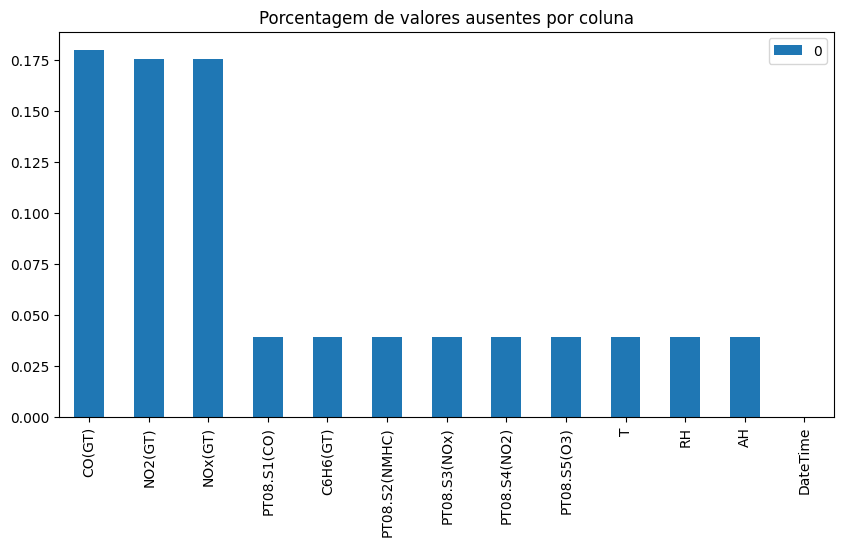

In [28]:
# Verificando quantidade de missing values por coluna
missing_values = df.isna().sum().div(df.shape[0]).to_frame().sort_values(by=0, ascending=False)
missing_values.plot(kind='bar', figsize=(10, 5))
plt.title('Porcentagem de valores ausentes por coluna')
plt.show()

In [27]:
# Decidimos a descartar a coluna NMHC(GT), mais 80% de valores ausentes. Imputar a mediana pode apresentar padrões lineares artificiais.
df.drop(columns=['NMHC(GT)'], inplace=True)
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
count,7674.000000,8991.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,9357
mean,2.152750,1099.833166,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,2004-09-21 16:00:00
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004-03-10 18:00:00
25%,1.100000,937.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,2004-06-16 05:00:00
50%,1.800000,1063.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,2004-09-21 16:00:00
75%,2.900000,1231.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,2004-12-28 03:00:00
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005-04-04 14:00:00
std,1.453252,217.080037,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813,NaN


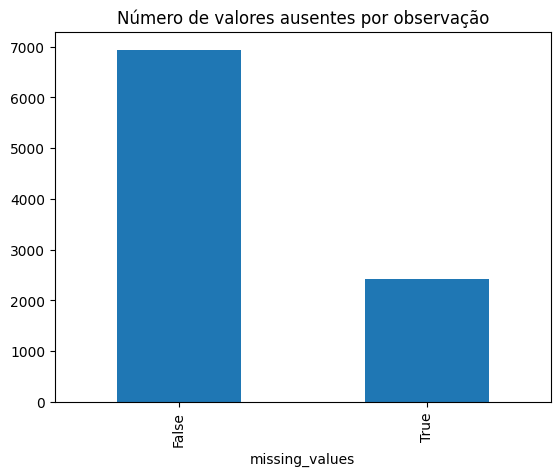

In [30]:
# Criando uma nova coluna para agregar os valores e gerando um gráfico de barras dos total de valores ausentes por registro único
df['missing_values'] = df.isnull().any(axis=1)
df.groupby('missing_values').size().plot(kind='bar')
plt.title('Número de valores ausentes por observação')
plt.show()

In [31]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,missing_values
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,False
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,False
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,False
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,False
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,False


In [ ]:
# Hipótese 1: se descartarmos as demais colunas ou registros com valores nulos, perderemos muita capacidade de previsão do modelo.
# Poderiamos preencher os valores NaN com a mediana da coluna, mas os padrões lineares gerados seriam de fato artificiais.
# Dessa forma, vamos seguir com a Hipótese 2.
'''
for column in df.columns:
    if df[column].isnull().any():
        df[column].fillna(df[column].median(), inplace=True)

df.describe()
'''

'\nfor column in df.columns:\n    if df[column].isnull().any():\n        df[column].fillna(df[column].median(), inplace=True)\n\ndf.describe()\n'

In [32]:
# Hipótese 2: Como ainda teremos em torno de 7000 observações na amostra após remover os dados ausentes, decidimos removê-los para assegurar maior fidelidade.
df = df.dropna()
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941
mean,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573,2004-09-28 01:45:40.066272896
min,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004-03-10 18:00:00
25%,1.100000,956.000000,4.900000,760.000000,103.000000,642.000000,79.000000,1207.000000,760.000000,11.200000,35.300000,0.694100,2004-06-15 05:00:00
50%,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900,2004-10-08 05:00:00
75%,2.900000,1254.000000,14.600000,1135.000000,335.000000,947.000000,142.000000,1683.000000,1322.000000,23.700000,62.200000,1.251600,2005-01-12 18:00:00
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600,2005-04-04 14:00:00
std,1.441158,218.733754,7.465226,264.055002,208.611371,251.897200,47.475017,353.301576,406.509957,8.844909,17.433193,0.401097,NaN


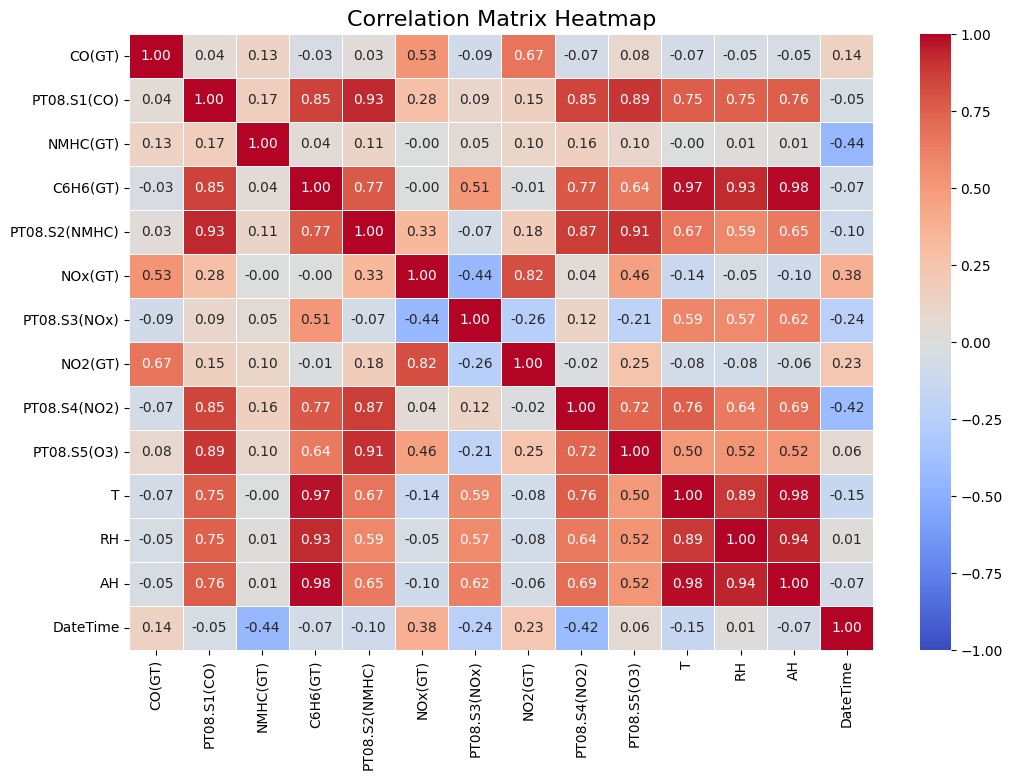

In [54]:
# As distribuições parecem melhores agora. Vamos exibir a nova matriz de correlação para análise.

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin = -1)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [55]:
# Vamos excluir a coluna intermediária 'missing_values' e a coluna 'DateTime'
df.drop(columns=['DateTime'], inplace=True)
#df.drop(columns=['missing_values'], inplace=True)

# Vamos manter as demais variáveis de baixa correlação por enquanto.
df.drop(columns=['T'], inplace=True)
df.drop(columns=['RH'], inplace=True)
df.drop(columns=['AH'], inplace=True)

In [35]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0


In [56]:
# Calculando as correlações entre as variáveis ​​preditoras e a variável alvo
correlations = df.corr()['CO(GT)'].sort_values(ascending=False)
print(correlations)

CO(GT)           1.000000
NO2(GT)          0.671127
NOx(GT)          0.526451
NMHC(GT)         0.128351
PT08.S5(O3)      0.080310
PT08.S1(CO)      0.041411
PT08.S2(NMHC)    0.029926
C6H6(GT)        -0.031378
PT08.S4(NO2)    -0.073724
PT08.S3(NOx)    -0.089981
Name: CO(GT), dtype: float64


In [57]:
# Preparando as variáveis para treinar o modelo.
X = df.drop('CO(GT)', axis=1)
y = df['CO(GT)']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Treinar com o ExtraTrees
#model = ExtraTreesRegressor(random_state=7, n_estimators=67, max_features='sqrt', max_depth=100, min_samples_split=13, min_samples_leaf=1, bootstrap = False)
#model = ExtraTreesRegressor(random_state=42, n_estimators=350, max_features='sqrt', max_depth=None, min_samples_split=2, min_samples_leaf=1)
model = ExtraTreesRegressor();
model.fit(X_train, y_train)

ExtraTreesRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
# Fazer previsões
y_pred = model.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 23.604224320818066
Mean Squared Error (MSE): 2237.255608219249
Root Mean Squared Error (RMSE): 47.29963644912347
R² Score: 0.6213253466335951


In [44]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000
mean,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519
std,1.441158,218.733754,7.465226,264.055002,208.611371,251.897200,47.475017,353.301576,406.509957
min,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000
25%,1.100000,956.000000,4.900000,760.000000,103.000000,642.000000,79.000000,1207.000000,760.000000
50%,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000
75%,2.900000,1254.000000,14.600000,1135.000000,335.000000,947.000000,142.000000,1683.000000,1322.000000
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000


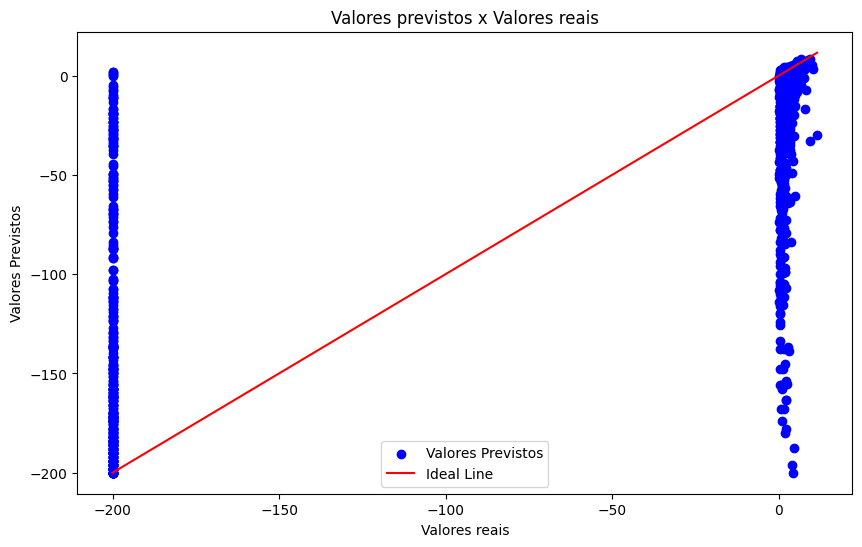

In [61]:
# Gráfico de valores previstos x valores atuais
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=y_pred, color='blue', label='Valores Previstos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', label='Ideal Line')
plt.xlabel('Valores reais')
plt.ylabel('Valores Previstos')
plt.title('Valores previstos x Valores reais')
plt.legend()
plt.show()